# Instructions
- Some parts of the code are already done for you
- You need to execute all the cells
- You need to add the code where ever you see `"#### Add your code here ####"`
- Marks are mentioned along with the cells

# Face detection
Task is to predict the boundaries(mask) around the face in a given image.

## Dataset
Faces in images marked with bounding boxes. Have around 500 images with around 1100 faces manually tagged via bounding box.

In [2]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


### Mount Google drive if you are using google colab
- We recommend using Google Colab as you can face memory issues and longer runtimes while running on local

### Change current working directory to project folder (1 mark)

In [0]:
#### Add your code here ####
import os
os.getcwd()
os.chdir('/content/drive/My Drive')


In [5]:
!ls |grep 'images.npy'

images.npy


### Load the "images.npy" file (2 marks)
- This file contains images with details of bounding boxes

In [0]:
#### Add your code here ####
import numpy as np
data = np.load('./images.npy',allow_pickle=True)

### Check one sample from the loaded "images.npy" file  (2 marks)

In [7]:
#### Add your code here ####
data[0][0]

array([[[42, 37, 34],
        [56, 51, 48],
        [71, 66, 63],
        ...,
        [23, 33, 34],
        [26, 36, 37],
        [28, 38, 39]],

       [[40, 35, 32],
        [51, 46, 43],
        [64, 59, 56],
        ...,
        [27, 36, 35],
        [24, 33, 32],
        [26, 35, 34]],

       [[43, 38, 35],
        [51, 46, 43],
        [61, 56, 53],
        ...,
        [28, 30, 27],
        [33, 35, 32],
        [35, 37, 34]],

       ...,

       [[56, 47, 40],
        [57, 48, 41],
        [61, 52, 45],
        ...,
        [67, 48, 42],
        [55, 35, 28],
        [60, 40, 33]],

       [[53, 44, 37],
        [54, 45, 38],
        [57, 48, 41],
        ...,
        [59, 40, 34],
        [60, 40, 33],
        [54, 34, 27]],

       [[53, 44, 37],
        [54, 45, 38],
        [57, 48, 41],
        ...,
        [59, 40, 34],
        [70, 50, 43],
        [64, 44, 37]]], dtype=uint8)

### Set image dimensions   (1 mark)
- Initialize image height, image width with value: 224 

In [0]:
IMAGE_WIDTH = 224 #### Add your code here ####
IMAGE_HEIGHT = 224 #### Add your code here ####

### Create features and labels
- Here feature is the image
- The label is the mask
- Images will be stored in "X_train" array
- Masks will be stored in "masks" array

In [0]:
import cv2
from tensorflow.keras.applications.mobilenet import preprocess_input

masks = np.zeros((int(data.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH))
X_train = np.zeros((int(data.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH, 3))
for index in range(data.shape[0]):
    img = data[index][0]
    img = cv2.resize(img, dsize=(IMAGE_HEIGHT, IMAGE_WIDTH), interpolation=cv2.INTER_CUBIC)
    try:
      img = img[:, :, :3]
    except:
      continue
    X_train[index] = preprocess_input(np.array(img, dtype=np.float32))
    for i in data[index][1]:
        x1 = int(i["points"][0]['x'] * IMAGE_WIDTH)
        x2 = int(i["points"][1]['x'] * IMAGE_WIDTH)
        y1 = int(i["points"][0]['y'] * IMAGE_HEIGHT)
        y2 = int(i["points"][1]['y'] * IMAGE_HEIGHT)
        masks[index][y1:y2, x1:x2] = 1

In [0]:
# splitting data in train and test
from sklearn.model_selection import train_test_split
X_Train, X_Test, y_train, y_test = train_test_split(X_train, masks, test_size=.10, random_state=42)

### Print the shape of X_train and mask array  (1 mark)

In [344]:
#### Add your code here ####
X_Train.shape,X_Test.shape



((368, 224, 224, 3), (41, 224, 224, 3))

In [37]:
#### Add your code here ####
y_train.shape, y_test.shape


((327, 224, 224), (82, 224, 224))

### Print a sample image and image array

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[[-0.53725493 -0.17647058  0.28627455]
  [-0.53725493 -0.17647058  0.28627455]
  [-0.52941179 -0.1607843   0.27843142]
  ...
  [-0.57647061 -0.28627449  0.12156868]
  [-0.59215689 -0.27058822  0.09019613]
  [-0.58431375 -0.30196077  0.07450986]]

 [[-0.52941179 -0.16862744  0.29411769]
  [-0.52156866 -0.1607843   0.30196083]
  [-0.52156866 -0.15294117  0.28627455]
  ...
  [-0.56078434 -0.27058822  0.13725495]
  [-0.58431375 -0.27058822  0.12941182]
  [-0.57647061 -0.29411763  0.11372554]]

 [[-0.52941179 -0.14509803  0.3176471 ]
  [-0.52941179 -0.14509803  0.3176471 ]
  [-0.50588238 -0.1607843   0.32549024]
  ...
  [-0.56078434 -0.27058822  0.13725495]
  [-0.56862748 -0.25490195  0.12941182]
  [-0.60000002 -0.28627449  0.09803927]]

 ...

 [[-0.92156863 -0.89803922 -0.85882354]
  [-0.89803922 -0.87450981 -0.83529413]
  [-0.9137255  -0.89019608 -0.8509804 ]
  ...
  [-0.96078432 -0.92156863 -0.95294118]
  [-0.94509804 -0.92941177 -0.93725491]
  [-0.94509804 -0.92941177 -0.93725491]]

 [

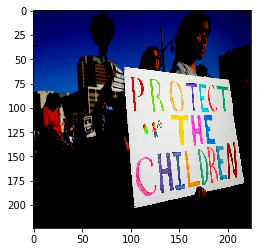

In [345]:
from matplotlib import pyplot
n = 10
print(X_Train[n])
pyplot.imshow(X_Train[n])

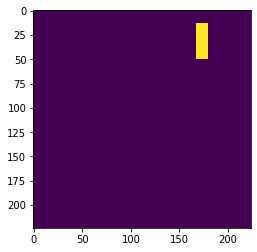

In [346]:
pyplot.imshow(y_train[n])

## Create the model (10 marks)
- Add MobileNet as model with below parameter values
  - input_shape: IMAGE_HEIGHT, IMAGE_WIDTH, 3
  - include_top: False
  - alpha: 1.0
  - weights: "imagenet"
- Add UNET architecture layers
  - This is the trickiest part of the project, you need to research and implement it correctly

In [0]:
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.layers import Concatenate, UpSampling2D, Conv2D, Reshape,concatenate
from tensorflow.keras.models import Model

def create_model(trainable=True):
    model = MobileNet(weights='imagenet',input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3), include_top=False, alpha=ALPHA)#### Add your code here ####
    for layer in model.layers:
        layer.trainable = trainable

    # Add all the UNET layers here
    x1 = model.layers[-1].output
    #x = Conv2D(512,(1,1),padding='same')(x1)
    x = UpSampling2D((2,2))(x1)
    x2 = model.layers[-46].output
    x = concatenate([x2,x])
    #x = Conv2D(1024,(1,1),padding='same')(x)
    #x = Conv2D(512,(1,1),padding='same')(x)
    x = Conv2D(256,(1,1),padding='same')(x)
    x = UpSampling2D((2,2))(x)
    x3 = model.layers[-59].output
    x = concatenate([x3,x])
    #x = Conv2D(256,(1,1),padding='same')(x)
    x = Conv2D(128,(1,1),padding='same')(x)
    x = UpSampling2D((2,2))(x)
    x4 = model.layers[-72].output
    x = concatenate([x4,x])
    #x = Conv2D(128,(1,1),padding='same')(x)
    #x = Conv2D(64,(1,1),padding='same')(x)
    x = Conv2D(32,(1,1),padding='same')(x)
    x = UpSampling2D((2,2))(x)
    x5 = model.layers[-85].output
    x = concatenate([x5,x])
    x = Conv2D(32,(1,1),padding='same')(x)
    x = UpSampling2D((2,2))(x)
    x6 = model.layers[0].output
    #x = concatenate([x6,x])
    x = Conv2D(32,(1,1))(x)
    #x = Conv2D(16,(1,1),padding='same')(x)
    #x = Conv2D(3,(1,1),padding='same')(x)
    x = Conv2D(1,(1,1),padding='same')(x)
    x = Reshape((224,224))(x)

    return Model(inputs=model.input, outputs=x)#### Add your code here ####

In [348]:
model = create_model()
model.summary()

Model: "model_17"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_19 (InputLayer)           [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_19[0][0]                   
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 32) 864         conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 32) 128         conv1[0][0]                      
___________________________________________________________________________________________

### Call the create_model function

### Define dice coefficient function (5 marks)
- Create a function to calculate dice coefficient


In [0]:
def dice_coefficient(y_true, y_pred,smooth=1):
    #### Add your code here ####
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)

    

### Define loss

In [0]:
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.backend import log, epsilon
def loss(y_true, y_pred):
    return binary_crossentropy(y_true, y_pred) - log(dice_coefficient(y_true, y_pred) + epsilon())

### Compile the model (2 marks)
- Complie the model using below parameters
  - loss: use the loss function defined above
  - optimizers: use Adam optimizer
  - metrics: use dice_coefficient function defined above

In [0]:
#### Add your code here ####
from keras import backend as K
model.compile(loss=loss, optimizer="adam")

### Define checkpoint and earlystopping

In [358]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
checkpoint = ModelCheckpoint("model-{loss:.2f}.h5", monitor="loss", verbose=1, save_best_only=True,
                             save_weights_only=True, mode="min", period=1)
stop = EarlyStopping(monitor="loss", patience=5, mode="min")
reduce_lr = ReduceLROnPlateau(monitor="loss", factor=0.2, patience=5, min_lr=1e-6, verbose=1, mode="min")

### Fit the model (2 marks)
- Fit the model using below parameters
  - epochs: you can decide
  - batch_size: 1
  - callbacks: checkpoint, reduce_lr, stop

In [359]:
#### Add your code here ####
MULTI_PROCESSING = False # I have a 2 core computer without GPU
THREADS = 1 # I have a 2 core computer without GPU
model.fit(X_Train,y_train,
                    epochs=1,batch_size=1,
                    callbacks=[checkpoint, reduce_lr, stop],
                    validation_data=(X_Test,y_test),
                    verbose=1)

Train on 368 samples, validate on 41 samples
367/368 [============================>.] - ETA: 0s - loss: 1.9008
Epoch 00001: loss improved from inf to 1.90682, saving model to model-1.91.h5
368/368 [==============================] - 14s 38ms/sample - loss: 1.9068 - val_loss: 2.4098


### Get the predicted mask for a sample image   (3 marks)

In [0]:
# predicting for the train and test 

#### Add your code here ####
y_true = model.predict(X_Train)
y_pred = model.predict(X_Test)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


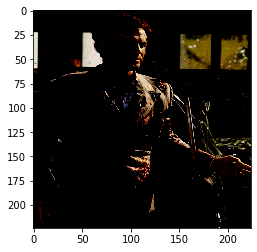

In [354]:
# predicting mask for sample image
from matplotlib import pyplot
n = 10
sample_image = X_Test[n]
pyplot.imshow(sample_image)


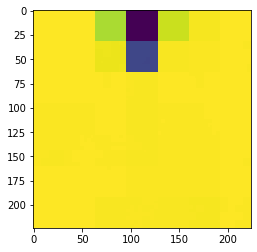

In [361]:
pyplot.imshow(y_pred[n])

### Impose the mask on the image (3 marks)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


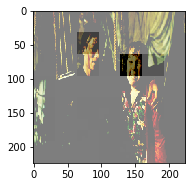

In [362]:
#### Add your code here ####
# for sample 7 in test set
import matplotlib.pyplot as plt
plt.figure()
plt.subplot(1,2,1)
plt.imshow((X_Test[7]), 'gray')
plt.subplot(1,2,1)
plt.imshow(y_pred[7], 'gray',alpha=.5)

plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


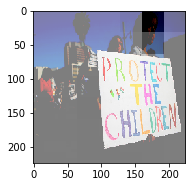

In [363]:
# for sample 10 in train set
import matplotlib.pyplot as plt
plt.figure()
plt.subplot(1,2,1)
plt.imshow(X_Train[10], 'gray', interpolation='none',vmin=0,vmax=255)
plt.subplot(1,2,1)
plt.imshow(y_true[10], 'gray', interpolation='none',alpha=.5)

plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


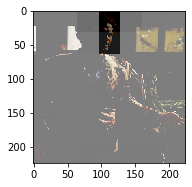

In [371]:
sample = X_Test[10]
sample_pred_mask = y_pred[10]
plt.figure()
plt.subplot(1,2,1)
plt.imshow(sample, 'gray', interpolation='none',vmin=0,vmax=255)
plt.subplot(1,2,1)
plt.imshow(sample_pred_mask, 'gray',alpha=.5)

plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


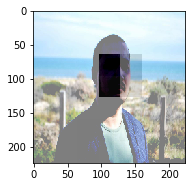

In [367]:
sample = X_Test[40]
sample_pred_mask = y_pred[40]
plt.figure()
plt.subplot(1,2,1)
plt.imshow(sample, 'gray', interpolation='none')
plt.subplot(1,2,1)
plt.imshow(sample_pred_mask, 'gray',alpha=.5)

plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


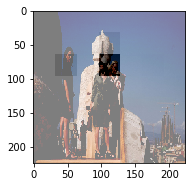

In [368]:
sample = X_Test[30]
sample_pred_mask = y_pred[30]
plt.figure()
plt.subplot(1,2,1)
plt.imshow(sample, 'gray')
plt.subplot(1,2,1)
plt.imshow(sample_pred_mask, 'gray',alpha=.5)

plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


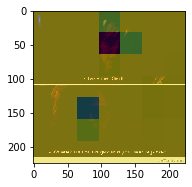

In [370]:
sample = X_Test[20]
sample_pred_mask = y_pred[20]
plt.figure()
plt.subplot(1,2,1)
plt.imshow(sample,'gray')
plt.subplot(1,2,1)
plt.imshow(sample_pred_mask,alpha=.5)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


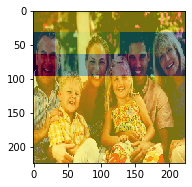

In [372]:
sample = X_Test[0]
sample_pred_mask = y_pred[0]
plt.figure()
plt.subplot(1,2,1)
plt.imshow(sample,'gray')
plt.subplot(1,2,1)
plt.imshow(sample_pred_mask,alpha=.5)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


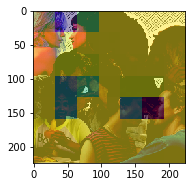

In [373]:
sample = X_Test[5]
sample_pred_mask = y_pred[5]
plt.figure()
plt.subplot(1,2,1)
plt.imshow(sample,'gray')
plt.subplot(1,2,1)
plt.imshow(sample_pred_mask,alpha=.5)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


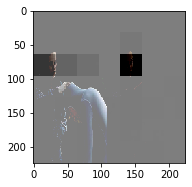

In [377]:
sample = X_Test[35]
sample_pred_mask = y_pred[35]
plt.figure()
plt.subplot(1,2,1)
plt.imshow(sample,'gray')
plt.subplot(1,2,1)
plt.imshow(sample_pred_mask,'gray',alpha=.5)
plt.show()